# Volume 4: Wave Equation
    <Name>
    <Class>
    <Date>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani
from scipy.linalg import toeplitz
from scipy.sparse import diags
import scipy.optimize
from matplotlib.animation import FuncAnimation
from scipy.sparse import csc_matrix
import sympy as sp

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,0.5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

In [3]:
# Set constants
s = 1
J = 50
M = 50
n = 50
deltaT = (0.5 - 0)/M
deltaX = 1/J

# Initialize lambda and the U_m matrix
lambd = s * (deltaT)/ (deltaX)
U_m = []

# Set x and t linspaces
X = np.linspace(0,1,J+1)[1:-1]
T = np.linspace(0,0.5, M+1)

# Define the initial condition function
f = lambda x: np.sin(2*np.pi*x)
f_double_prime = lambda x: (-4*np.pi**2)*(np.sin(2*np.pi*x))

# Find initial U_0 matrix
U_0 = f(X)

# Find U_1 matrix
right_side = (s**2 * deltaT**2 / 2) * f_double_prime(X)
U_1 = U_0 + right_side

# Append both matrices
U_m.append(U_0)
U_m.append(U_1)

# Define Diagonals for A 
main_diagonal = [2 * (1-lambd**2) for num in range(n-1)]
side_diagonal = [lambd**2 for num in range(n-1)]
diagonals = [side_diagonal, main_diagonal, side_diagonal]
offsets = [-1,0,1]

# Make A
A = diags(diagonals, offsets, shape = (n-1, n-1))

# Find all U vectors for all times
U_temp1 = U_0
U_temp2 = U_1
for t in range(M-1):
    U_temp3= A @ U_temp2 - U_temp1
    U_temp1 = U_temp2
    U_temp2 = U_temp3
    U_m.append(U_temp3)
    

    
    




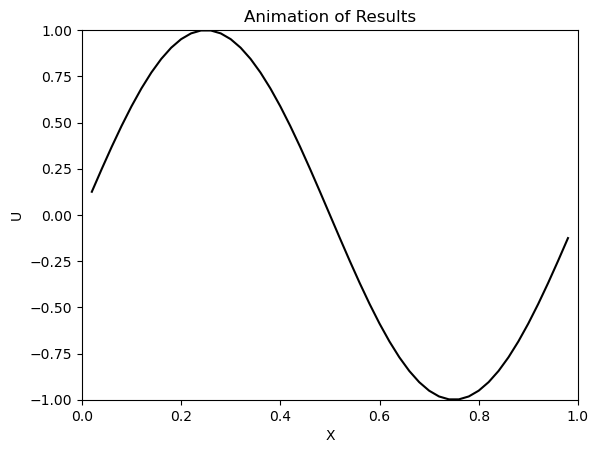

In [4]:
# Animation of the results

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0, 1])
plt.ylim([-1,1])
plt.title('Animation of Results')
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X,U_m[t])
    return line

# Make animation
ani = FuncAnimation(fig, update, frames = range(0, len(U_m)), interval = 100)
ani.save('Problem1.mp4')

<video src= "Problem1.mp4" controls>

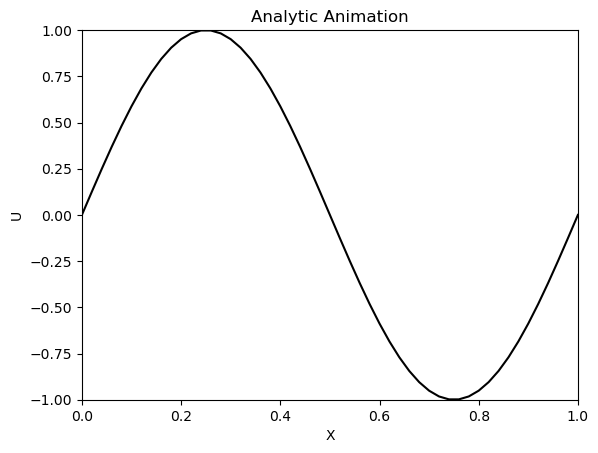

In [5]:
# Compare your results to the analytic solution
# u(x,t) = sin(2pix)*cos(2pit)

# Define X and T linspaces
X = np.linspace(0,1,J+1)
T = np.linspace(0,0.5, M+1)

# Define the analytic function
g = lambda x, t: np.sin(2*np.pi*x) * np.cos(2*np.pi*t)

# Initialize array for results
analytic_array = []

# Get results
for t in T:
    list = [g(x,t) for x in X]
    analytic_array.append(list)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0, 1])
plt.ylim([-1,1])
plt.title('Analytic Animation')
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X,analytic_array[t])
    return line

# Make animation
ani = FuncAnimation(fig, update, frames = range(0, len(analytic_array)), interval = 100)
ani.save('Analytic_Result.mp4')


<video src = "Analytic_Result.mp4" controls>

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-m^2(x-1/2)^2} \\
y_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundart conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

In [6]:
# First Mesh

# Set constants
s = 1
J = 200
M = 220
n = J
deltaT = 1/M
deltaX = 1/J

# Initialize lambda and the U_m matrix
lambd = s * (deltaT) / (deltaX)
U_m = []

# Set x and t linspaces
X = np.linspace(0,1,J+1)[1:-1]
T = np.linspace(0,1, M+1)

# Define the initial condition function
x = sp.symbols('x')
f = 0.2 * sp.exp(-(20**2)*(x-1/2)**2)
f_prime = sp.diff(f,x)
f_double_prime = sp.diff(f_prime,x)

# Define g(x)
g = lambda x: (0.4)*(20**2)*(x-1/2)*(np.exp(-(20**2)*(x-1/2)**2))

# Find initial U_0 matrix
U_0 = np.array([f.subs(x,val) for val in X])

# Find U_1 matrix
middle_part = g(X) * deltaT
right_part = (s**2 * deltaT**2/2) * np.array([f_double_prime.subs(x,val) for val in X])
U_1 = U_0 + middle_part + right_part

# Append both matrices
U_m.append(U_0)
U_m.append(U_1)

# Define Diagonals for A 
main_diagonal = [2 * (1-lambd**2) for num in range(n-1)]
side_diagonal = [lambd**2 for num in range(n-1)]
diagonals = [side_diagonal, main_diagonal, side_diagonal]
offsets = [-1,0,1]

# Make A
A = diags(diagonals, offsets, shape = (n-1, n-1))
A = csc_matrix(A)

# Convert U_0 and U_1
U_0 = U_0.astype(np.float64)
U_1 = U_1.astype(np.float64)


# Find all U vectors for all times
U_temp1 = U_0
U_temp2 = U_1
for t in range(M-1):
    U_temp3 = A.dot(U_temp2) - U_temp1
    U_temp1 = U_temp2
    U_temp2 = U_temp3
    U_m.append(U_temp3)




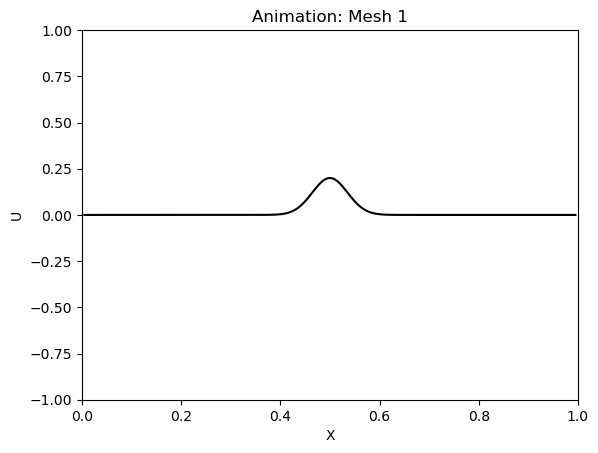

In [7]:
# Animate Mesh 1

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,1])
plt.ylim([-1,1])
plt.title('Animation: Mesh 1')
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X, U_m[t])
    return line

# Make Animation
ani = FuncAnimation(fig, update, frames = range(0, len(U_m)), interval = 20)
ani.save('Problem2_Mesh1.mp4')

In [8]:
# Second Mesh

# Set constants
s = 1
J = 200
M = 180
n = J
deltaT = 1/M
deltaX = 1/J

# Initialize lambda and the U_m matrix
lambd = s * (deltaT) / (deltaX)
U_m = []

# Set x and t linspaces
X = np.linspace(0,1,J+1)[1:-1]
T = np.linspace(0,1, M+1)

# Define the initial condition function
x = sp.symbols('x')
f = 0.2 * sp.exp(-(20**2)*(x-1/2)**2)
f_prime = sp.diff(f,x)
f_double_prime = sp.diff(f_prime,x)

# Define g(x)
g = lambda x: (0.4)*(20**2)*(x-1/2)*(np.exp(-(20**2)*(x-1/2)**2))

# Find initial U_0 matrix
U_0 = np.array([f.subs(x,val) for val in X])

# Find U_1 matrix
middle_part = g(X) * deltaT
right_part = (s**2 * deltaT**2/2) * np.array([f_double_prime.subs(x,val) for val in X])
U_1 = U_0 + middle_part + right_part

# Append both matrices
U_m.append(U_0)
U_m.append(U_1)

# Define Diagonals for A 
main_diagonal = [2 * (1-lambd**2) for num in range(n-1)]
side_diagonal = [lambd**2 for num in range(n-1)]
diagonals = [side_diagonal, main_diagonal, side_diagonal]
offsets = [-1,0,1]

# Make A
A = diags(diagonals, offsets, shape = (n-1, n-1))
A = csc_matrix(A)

# Convert U_0 and U_1
U_0 = U_0.astype(np.float64)
U_1 = U_1.astype(np.float64)


# Find all U vectors for all times
U_temp1 = U_0
U_temp2 = U_1
for t in range(M-1):
    U_temp3 = A.dot(U_temp2) - U_temp1
    U_temp1 = U_temp2
    U_temp2 = U_temp3
    U_m.append(U_temp3)

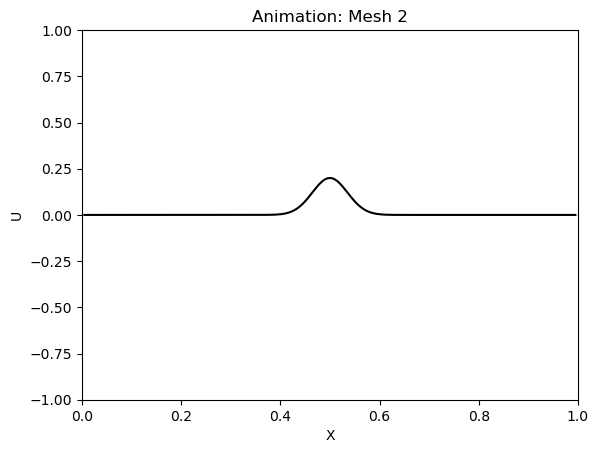

In [9]:
# Animate Mesh 2

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,1])
plt.ylim([-1,1])
plt.title('Animation: Mesh 2')
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X, U_m[t])
    return line

# Make Animation
ani = FuncAnimation(fig, update, frames = range(0, len(U_m)), interval = 20)
ani.save('Problem2_Mesh2.mp4')

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

In [31]:
# Set constants
s = 1
J = 200
M = 440
n = J
m = 20
deltaT = 2/M
deltaX = 1/J

# Initialize lambda and the U_m matrix
lambd = s * (deltaT) / (deltaX)
U_m = []

# Set x and t linspaces
X = np.linspace(0,1,J+1)[1:-1]
T = np.linspace(0,0.5, M+1)

# Define the initial condition function
f = lambda x: (0.2)*(np.exp(-(m**2)*(x-0.5)**2))
f_double_prime = lambda x: (-0.2)*(m**2)*((-m**2)*np.exp((-m**2)*(x**2 - x + 1/4))*(2*x-1)**2 + 2*np.exp(-m**2 * (x**2 - x + 1/4)))

# Find initial U_0 matrix
U_0 = f(X)

# Find U_1 matrix
right_side = (s**2 * deltaT**2 /2) * f_double_prime(X)
U_1 = U_0 + right_side

# Append both matrices
U_m.append(U_0)
U_m.append(U_1)

# Define Diagonals for A 
main_diagonal = [2 * (1-lambd**2) for num in range(n-1)]
side_diagonal = [lambd**2 for num in range(n-1)]
diagonals = [side_diagonal, main_diagonal, side_diagonal]
offsets = [-1,0,1]

# Make A
A = diags(diagonals, offsets, shape = (n-1, n-1))

# Find all U vectors for all times
U_temp1 = U_0
U_temp2 = U_1
for t in range(M-1):
    U_temp3= A @ U_temp2 - U_temp1
    U_temp1 = U_temp2
    U_temp2 = U_temp3
    U_m.append(U_temp3)
    



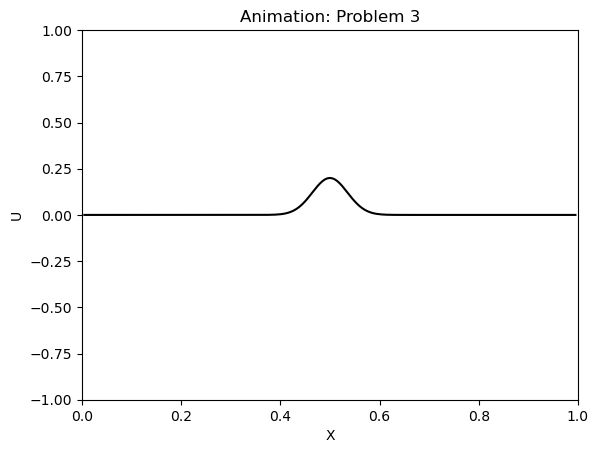

In [32]:
# Animate Problem 3

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.title('Animation: Problem 3')
plt.xlim([0,1])
plt.ylim([-1,1])
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X, U_m[t])
    return line

# Make Animation
ani = FuncAnimation(fig, update,
                    frames = range(0, len(U_m)), interval = 20)

ani.save('Problem3.mp4')

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

In [ ]:
# Set constants
s = 1
J = 200
M = 440
n = J
deltaT = 2/M
deltaX = 1/J

# Initialize lambda and the U_m matrix
lambd = s * (deltaT) / (deltaX)
U_m = []

# Set x and t linspaces
X = np.linspace(0,1,J+1)[1:-1]
T = np.linspace(0,0.5, M+1)

# Define the initial condition function
f = lambda x: 1/3 if (5/11 < x < 6/11) else 0

# Find initial U_0 matrix
U_0 = np.array([f(val) for val in X])

# Find initial U_1 matrix
U_1 = U_0

# Append both matrices
U_m.append(U_0)
U_m.append(U_1)

# Define Diagonals for A 
main_diagonal = [2 * (1-lambd**2) for num in range(n-1)]
side_diagonal = [lambd**2 for num in range(n-1)]
diagonals = [side_diagonal, main_diagonal, side_diagonal]
offsets = [-1,0,1]

# Make A
A = diags(diagonals, offsets, shape = (n-1, n-1))

# Find all U vectors for all times
U_temp1 = U_0
U_temp2 = U_1
for t in range(M-1):
    U_temp3= A @ U_temp2 - U_temp1
    U_temp1 = U_temp2
    U_temp2 = U_temp3
    U_m.append(U_temp3)




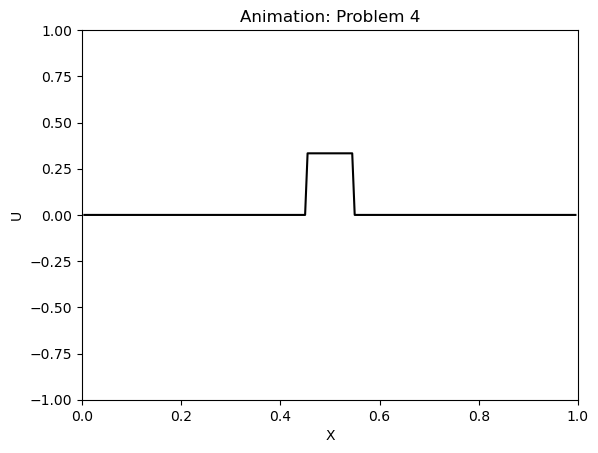

In [ ]:
# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,1])
plt.ylim([-1,1])
plt.title('Animation: Problem 4')
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X, U_m[t])
    return line

# Make Animation
ani = FuncAnimation(fig, update, frames = range(0, len(U_m)), interval = 20)
ani.save('Problem4.mp4')

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

In [40]:
# Set constants
s = 3
a = 2
umin, uplus = 5,1
v_greek = 1
delta = 0
J = 150
M = 350
n = J
deltaT = (1-0)/M
deltaX = (20-(-20))/J

# Find K1 and K2
K_1 = deltaT/(4*deltaX)
K_2 = deltaT/(2*(deltaX)**2)

U_m = []

# Set x and t linspaces
X = np.linspace(-20, 20, J+1)
T = np.linspace(0,1,M+1)

# Define the initial condition function
v = lambda x: 3.5*(np.sin(3*x) + 1)* (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
u_hat = lambda x: s - a * np.tanh((a*x)/(2*v_greek) + delta)
f = lambda x: u_hat(x) + v(x)

U0 = f(X)
U0[0], U0[-1] = umin, uplus
U_m.append(U0)

# Function representing the nonlinear system of equations
def crank_nicholson(next, current):
    x = [next[j] - current[j] - K_1 * ((s - next[j]) * (next[j+1] - next[j-1]) + (s - current[j]) * (current[j+1] - current[j-1]))
         - K_2 * ((next[j+1] - 2 * next[j] + next[j-1]) + (current[j+1] - 2 * current[j] + current[j-1])) for j in range(1, J)]

    return np.concatenate(([next[0] - current[0]], x, [next[-1] - current[-1]]))

# Time-stepping loop
for t in range(M-1):
    current_solution = U_m[-1]
    next_solution = scipy.optimize.fsolve(crank_nicholson, current_solution, args=(current_solution,))
    U_m.append(next_solution)
    





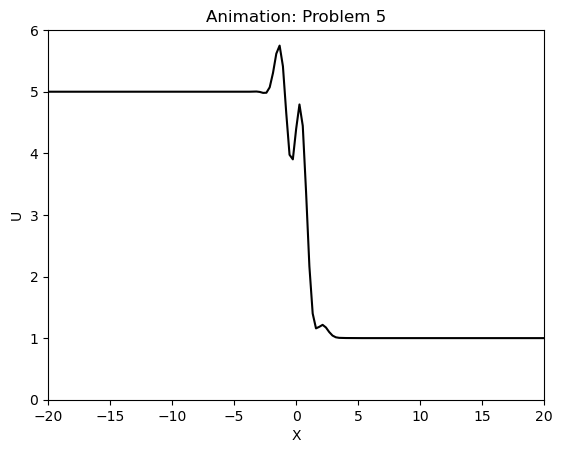

In [42]:
# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([-20,20])
plt.ylim([0,6])
plt.title('Animation: Problem 5')
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X, U_m[t])
    return line

# Make Animation
ani = FuncAnimation(fig, update, frames = range(0, len(U_m)), interval = 20)
ani.save('Problem5.mp4')